# importing modules

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,median_absolute_error
%matplotlib inline

# reading dataset

In [2]:
train_data = pd.read_csv('IEEE_train_data.csv')
test_data = pd.read_csv('IEEE_test_data.csv')

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 591239 entries, 0 to 591238
Data columns (total 17 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   id                                      591239 non-null  int64  
 1   timestamp                               591239 non-null  object 
 2   active_power_calculated_by_converter    591229 non-null  float64
 3   active_power_raw                        591222 non-null  float64
 4   ambient_temperature                     581442 non-null  float64
 5   generator_speed                         274403 non-null  float64
 6   generator_winding_temp_max              591238 non-null  float64
 7   grid_power10min_average                 591204 non-null  float64
 8   nc1_inside_temp                         591007 non-null  float64
 9   nacelle_temp                            591021 non-null  float64
 10  reactice_power_calculated_by_converter  5912

In [4]:
train_data.isnull().sum()

id                                             0
timestamp                                      0
active_power_calculated_by_converter          10
active_power_raw                              17
ambient_temperature                         9797
generator_speed                           316836
generator_winding_temp_max                     1
grid_power10min_average                       35
nc1_inside_temp                              232
nacelle_temp                                 218
reactice_power_calculated_by_converter         4
reactive_power                                 2
wind_direction_raw                             7
wind_speed_raw                                 1
wind_speed_turbulence                         15
turbine_id                                     4
Target                                         0
dtype: int64

In [5]:
def plot_nans(df: pd.DataFrame):
    if df.isnull().sum().sum() != 0:
        na_df = (df.isnull().sum() / len(df)) * 100      
        na_df = na_df.drop(na_df[na_df == 0].index).sort_values(ascending=False)
        missing_data = pd.DataFrame({'Missing Ratio %' :na_df})
        missing_data.plot(kind = "barh")
        plt.show()
    else:
        print('No NAs found')

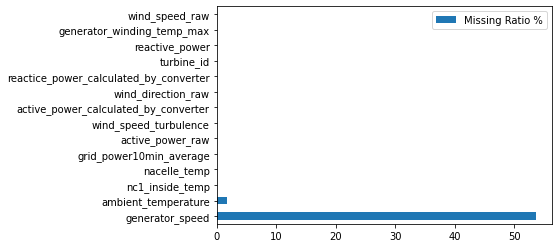

In [6]:
plot_nans(train_data)

##### from last cell we saw that 'id' is unique for all rows so we must detele this column and generaor_speed has alot of nans so i will delete it

In [7]:
train_data.drop(columns=['id'],inplace=True)

# handling features

#### handling generator_speed colulmn

In [8]:
generator_speed = train_data['generator_speed']
generator_speed.fillna(value=generator_speed.median(),inplace=True)

In [9]:
generator_speed.isnull().sum()

0

In [10]:

train_data['generator_speed'] = generator_speed

In [11]:
train_data.isnull().sum()

timestamp                                    0
active_power_calculated_by_converter        10
active_power_raw                            17
ambient_temperature                       9797
generator_speed                              0
generator_winding_temp_max                   1
grid_power10min_average                     35
nc1_inside_temp                            232
nacelle_temp                               218
reactice_power_calculated_by_converter       4
reactive_power                               2
wind_direction_raw                           7
wind_speed_raw                               1
wind_speed_turbulence                       15
turbine_id                                   4
Target                                       0
dtype: int64

### handling ambient_temperature column

In [12]:

train_data['ambient_temperature'] = train_data['ambient_temperature'].ffill().fillna(value=train_data['ambient_temperature'].median())

In [13]:
train_data.isnull().sum()

timestamp                                   0
active_power_calculated_by_converter       10
active_power_raw                           17
ambient_temperature                         0
generator_speed                             0
generator_winding_temp_max                  1
grid_power10min_average                    35
nc1_inside_temp                           232
nacelle_temp                              218
reactice_power_calculated_by_converter      4
reactive_power                              2
wind_direction_raw                          7
wind_speed_raw                              1
wind_speed_turbulence                      15
turbine_id                                  4
Target                                      0
dtype: int64

### splitting data into categorical data and numerical data

In [14]:

cat_train_data=train_data.select_dtypes(include='object')
num_train_data=train_data.select_dtypes(exclude='object')


##### handling missing values in cat_data

In [15]:
cat_train_data.isnull().sum()

timestamp     0
turbine_id    4
dtype: int64

In [16]:

cat_train_data['turbine_id']=cat_train_data['turbine_id'].fillna(value=cat_train_data['turbine_id'].mode()[0])

In [17]:
cat_train_data.isnull().sum()

timestamp     0
turbine_id    0
dtype: int64

##### handling missing values in num_data

In [18]:
num_train_data.isnull().sum()

active_power_calculated_by_converter       10
active_power_raw                           17
ambient_temperature                         0
generator_speed                             0
generator_winding_temp_max                  1
grid_power10min_average                    35
nc1_inside_temp                           232
nacelle_temp                              218
reactice_power_calculated_by_converter      4
reactive_power                              2
wind_direction_raw                          7
wind_speed_raw                              1
wind_speed_turbulence                      15
Target                                      0
dtype: int64

In [19]:

num_train_data.fillna(num_train_data.mean(),inplace=True)

In [20]:
num_train_data.isnull().sum()

active_power_calculated_by_converter      0
active_power_raw                          0
ambient_temperature                       0
generator_speed                           0
generator_winding_temp_max                0
grid_power10min_average                   0
nc1_inside_temp                           0
nacelle_temp                              0
reactice_power_calculated_by_converter    0
reactive_power                            0
wind_direction_raw                        0
wind_speed_raw                            0
wind_speed_turbulence                     0
Target                                    0
dtype: int64

#### preparing cat_data

In [21]:

from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
cat_train_data.turbine_id=lb.fit_transform(cat_train_data.turbine_id)
cat_train_data.timestamp = pd.to_datetime(cat_train_data.timestamp).astype(np.int64)

In [22]:
cat_train_data

,timestamp,turbine_id
0,1624367700000000000,0
1,1636220400000000000,15
2,1640293680000000000,11
3,1609603260000000000,14
4,1638812760000000000,14
...,...,...
591234,1616096220000000000,15
591235,1627102440000000000,10
591236,1636465860000000000,9
591237,1612234680000000000,14


In [23]:
cat_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 591239 entries, 0 to 591238
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   timestamp   591239 non-null  int64
 1   turbine_id  591239 non-null  int32
dtypes: int32(1), int64(1)
memory usage: 6.8 MB


In [24]:

num_train_data = num_train_data.join(cat_train_data)

#### all train_data now are numerical and ready for model training

In [25]:
num_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 591239 entries, 0 to 591238
Data columns (total 16 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   active_power_calculated_by_converter    591239 non-null  float64
 1   active_power_raw                        591239 non-null  float64
 2   ambient_temperature                     591239 non-null  float64
 3   generator_speed                         591239 non-null  float64
 4   generator_winding_temp_max              591239 non-null  float64
 5   grid_power10min_average                 591239 non-null  float64
 6   nc1_inside_temp                         591239 non-null  float64
 7   nacelle_temp                            591239 non-null  float64
 8   reactice_power_calculated_by_converter  591239 non-null  float64
 9   reactive_power                          591239 non-null  float64
 10  wind_direction_raw                      5912

In [26]:
num_train_data

,active_power_calculated_by_converter,active_power_raw,ambient_temperature,generator_speed,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,reactive_power,wind_direction_raw,wind_speed_raw,wind_speed_turbulence,Target,timestamp,turbine_id
0,59.071225,59.117203,35.765579,939.246460,64.812227,167.234988,31.835583,35.661191,18.228060,24.117071,316.953893,4.016191,0.524196,48.670906,1624367700000000000,0
1,258.278976,253.123637,33.392501,789.391492,57.227210,223.845406,32.870656,32.916340,84.444679,102.651681,70.390775,5.198709,0.311840,47.779032,1636220400000000000,15
2,234.884260,236.785260,33.320189,939.246460,47.570285,182.448718,33.043858,29.726347,19.863061,38.311028,302.287781,5.443600,0.367809,45.542946,1640293680000000000,11
3,50.535151,37.784692,33.320189,939.246460,33.838225,14.912772,33.752039,30.534683,94.085461,96.431728,93.148946,3.971027,0.631113,47.515691,1609603260000000000,14
4,247.842835,241.342895,32.897556,939.246460,64.972858,226.304581,32.558620,32.711412,93.393299,103.011902,140.825768,4.746520,0.341984,44.625755,1638812760000000000,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
591234,121.264847,108.633915,28.822063,939.246460,60.426447,78.542900,28.404571,32.300816,87.176760,97.308688,276.542084,3.921454,0.352061,49.511423,1616096220000000000,15
591235,679.381755,699.714915,26.066999,939.246460,59.386416,609.587229,34.645046,32.662838,49.636947,73.951992,262.125946,6.539214,0.620994,46.682127,1627102440000000000,10
591236,289.928238,285.483582,31.997511,821.810130,61.138416,517.386113,41.325528,37.321171,85.270166,106.643428,35.269936,4.627115,1.153216,49.314674,1636465860000000000,9
591237,28.318385,12.871501,33.040375,939.246460,47.513898,8.731869,32.886009,30.212943,92.453150,95.705736,184.148130,3.581920,0.277640,51.652792,1612234680000000000,14


c:\Users\gno\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1440x1440 with 0 Axes>

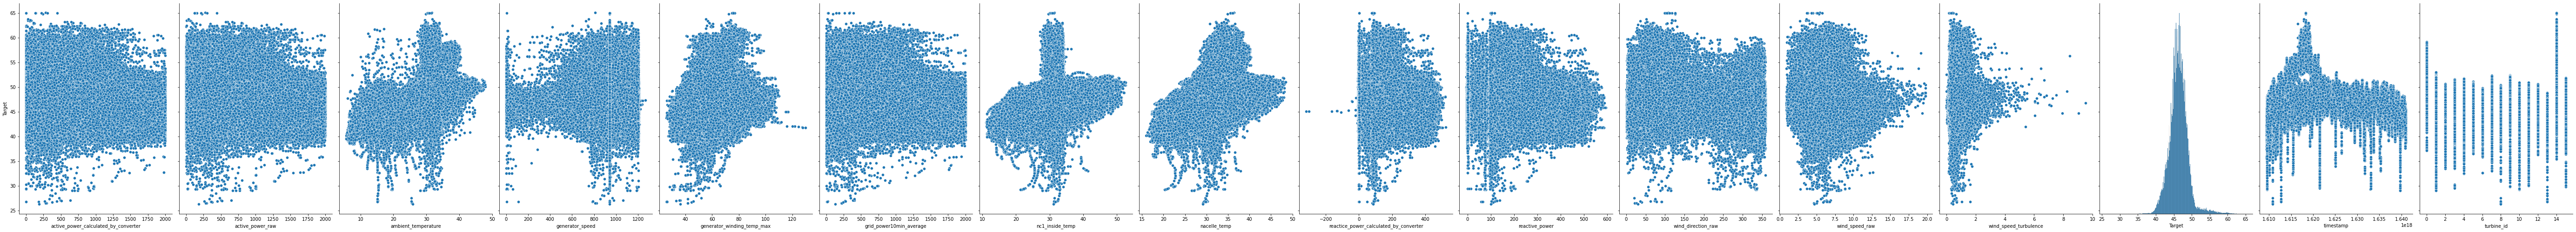

In [27]:
plt.figure(figsize=(20,20))
sns.pairplot(num_train_data, x_vars=num_train_data.columns, y_vars='Target', size=7, aspect=0.7)

In [28]:
X = num_train_data.drop(columns=['Target'])
y = num_train_data['Target']

In [29]:
high_corr_cols = []
for column in X.columns:
    corr = X[column].corr(y)
    print(f'{column} corrolation: {corr}')
    if corr >= 0.4 or corr <= -0.4:
        high_corr_cols.append(column)
print(high_corr_cols)

active_power_calculated_by_converter corrolation: -0.04147230774132538
active_power_raw corrolation: -0.04081095258864741
ambient_temperature corrolation: 0.41264355591967544
generator_speed corrolation: -0.031212728629035673
generator_winding_temp_max corrolation: 0.2952949601730324
grid_power10min_average corrolation: -0.04964532077948998
nc1_inside_temp corrolation: 0.20116536160169438
nacelle_temp corrolation: 0.5086661999223662
reactice_power_calculated_by_converter corrolation: -0.03392199225743711
reactive_power corrolation: -0.03549161971822332
wind_direction_raw corrolation: 0.06945427906440454
wind_speed_raw corrolation: -0.06797440620007299
wind_speed_turbulence corrolation: 0.09638186850073846
timestamp corrolation: -0.06951865381441724
turbine_id corrolation: -0.13874350592750503
['ambient_temperature', 'nacelle_temp']


In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X,X_test,y,y_test=train_test_split(X,y,train_size=0.8)

## handling outliars

In [32]:
X = X.join(y)

In [33]:
# for column in X.columns:
#     if column != 'Target':
#         Q1 = X[column].quantile(0.25)
#         Q3  = X[column].quantile(0.75)
#         IQR = Q3-Q1
#         X = X[(X[column] < Q3+(1.5*IQR)) & (X[column] > Q1-(1.5*IQR))]

In [34]:
y = X['Target']
X = X.drop(columns=['Target'])

<AxesSubplot:>

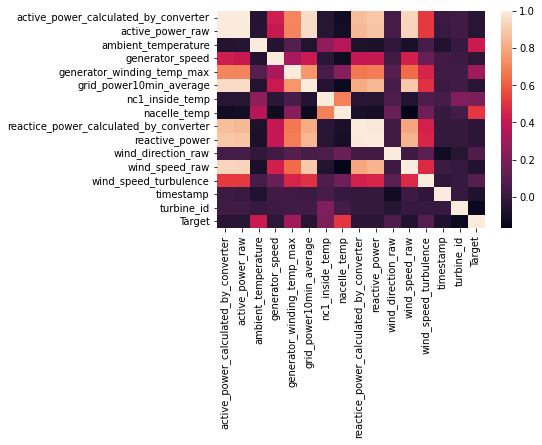

In [35]:
sns.heatmap(data=X.join(y).corr())

In [36]:
X_train,X_val,y_train,y_val = train_test_split(X,y,train_size=0.8)

In [37]:
# columns = X_train.columns
# sc = StandardScaler()
# # sc.fit_transform(X_train,y_train)
# for column in X_train.columns:
#     if column != 'Target':
#         X_train[column] = sc.fit_transform(np.array(X_train[column]).reshape(-1, 1))

In [38]:
# columns = X_val.columns
# for column in X_val.columns:
#     if column != 'Target':
#         X_val[column] = sc.transform(np.array(X_val[column]).reshape(-1, 1))

In [39]:
# columns = X_test.columns
# for column in X_test.columns:
#     if column != 'Target':
#         X_test[column] = sc.transform(np.array(X_test[column]).reshape(-1, 1))

In [40]:
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error,mean_absolute_error,median_absolute_error

## linear regression

In [41]:
lr = Ridge(alpha=0.00001)
lr.fit(X_train,y_train)
hx = lr.predict(X_val)

print(f'mean_absolute_error on val_data :{mean_absolute_error(y_val,hx)}')
print(f'mean_squared_error on val_data :{mean_squared_error(y_val,hx)}')
print(f'median_absolute_error on val_data :{median_absolute_error(y_val,hx)}')
print('_________________________________________________________')

hx = lr.predict(X_test)
print(f'mean_absolute_error on test_data :{mean_absolute_error(y_test,hx)}')
print(f'mean_squared_error on test_data :{mean_squared_error(y_test,hx)}')
print(f'median_absolute_error on test_data :{median_absolute_error(y_test,hx)}')



mean_absolute_error on val_data :1.3790810197227723
mean_squared_error on val_data :3.9030287225968334
median_absolute_error on val_data :1.0174219792789216
_________________________________________________________
mean_absolute_error on test_data :1.3735850965024676
mean_squared_error on test_data :3.8716523848454814
median_absolute_error on test_data :1.017536686143039


c:\Users\gno\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=7.91757e-34): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


## DecisionTree

In [42]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)
hx = dt.predict(X_val)

print(f'mean_absolute_error on val_data :{mean_absolute_error(y_val,hx)}')
print(f'mean_squared_error on val_data :{mean_squared_error(y_val,hx)}')
print(f'median_absolute_error on val_data :{median_absolute_error(y_val,hx)}')
print('_________________________________________________________')

hx = dt.predict(X_test)
print(f'mean_absolute_error on test_data :{mean_absolute_error(y_test,hx)}')
print(f'mean_squared_error on test_data :{mean_squared_error(y_test,hx)}')
print(f'median_absolute_error on test_data :{median_absolute_error(y_test,hx)}')


mean_absolute_error on val_data :0.5000650869781392
mean_squared_error on val_data :0.85407534516092
median_absolute_error on val_data :0.19935035999999684
_________________________________________________________
mean_absolute_error on test_data :0.5013181574780969
mean_squared_error on test_data :0.8704424767692263
median_absolute_error on test_data :0.19912577000000198


## RandomForestRegressor 

In [43]:
from sklearn.ensemble import RandomForestRegressor 
rf = RandomForestRegressor(n_estimators = 300,random_state = 1, max_depth=30,n_jobs=-1)
rf.fit(X_train,y_train)

hx = rf.predict(X_val)
print(f'mean_absolute_error on val_data :{mean_absolute_error(y_val,hx)}')
print(f'mean_squared_error on val_data :{mean_squared_error(y_val,hx)}')
print(f'median_absolute_error on val_data :{median_absolute_error(y_val,hx)}')
print('_________________________________________________________')

hx = rf.predict(X_test)
print(f'mean_absolute_error on test_data :{mean_absolute_error(y_test,hx)}')
print(f'mean_squared_error on test_data :{mean_squared_error(y_test,hx)}')
print(f'median_absolute_error on test_data :{median_absolute_error(y_test,hx)}')


results = list(zip(X, rf.feature_importances_))
importance = pd.DataFrame(results, columns = ["Feature", "Importance"])
importance = importance.sort_values(by="Importance", ascending=False)

print('_________________________________________________________')
print(importance)


mean_absolute_error on val_data :0.3981308485057258
mean_squared_error on val_data :0.38497646063794644
median_absolute_error on val_data :0.2632833683740614
_________________________________________________________
mean_absolute_error on test_data :0.4011144759882015
mean_squared_error on test_data :0.39503821142105155
median_absolute_error on test_data :0.2661813247722158
_________________________________________________________
                                   Feature  Importance
13                               timestamp    0.288278
14                              turbine_id    0.205139
2                      ambient_temperature    0.180452
7                             nacelle_temp    0.170380
4               generator_winding_temp_max    0.053411
6                          nc1_inside_temp    0.032646
10                      wind_direction_raw    0.020522
5                  grid_power10min_average    0.014751
12                   wind_speed_turbulence    0.009367
8   reactice_po

### support vector regressor

In [44]:
from sklearn.svm import LinearSVR
ls = LinearSVR()
ls.fit(X_train,y_train)

hx = ls.predict(X_val)
print(f'mean_absolute_error on val_data :{mean_absolute_error(y_val,hx)}')
print(f'mean_squared_error on val_data :{mean_squared_error(y_val,hx)}')
print(f'median_absolute_error on val_data :{median_absolute_error(y_val,hx)}')
print('_________________________________________________________')

hx = ls.predict(X_test)
print(f'mean_absolute_error on test_data :{mean_absolute_error(y_test,hx)}')
print(f'mean_squared_error on test_data :{mean_squared_error(y_test,hx)}')
print(f'median_absolute_error on test_data :{median_absolute_error(y_test,hx)}')


mean_absolute_error on val_data :46.32353943682195
mean_squared_error on val_data :2152.7635291362035
median_absolute_error on val_data :46.28891945
_________________________________________________________
mean_absolute_error on test_data :46.33558618602988
mean_squared_error on test_data :2153.8850251436234
median_absolute_error on test_data :46.30619812


c:\Users\gno\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [50]:
from xgboost.sklearn import XGBRegressor
xgr = XGBRegressor()
xgr.fit(X_train,y_train)

hx = xgr.predict(X_val)
print(f'mean_absolute_error on val_data :{mean_absolute_error(y_val,hx)}')
print(f'mean_squared_error on val_data :{mean_squared_error(y_val,hx)}')
print(f'median_absolute_error on val_data :{median_absolute_error(y_val,hx)}')
print('_________________________________________________________')

hx = xgr.predict(X_test)
print(f'mean_absolute_error on test_data :{mean_absolute_error(y_test,hx)}')
print(f'mean_squared_error on test_data :{mean_squared_error(y_test,hx)}')
print(f'median_absolute_error on test_data :{median_absolute_error(y_test,hx)}')

mean_absolute_error on val_data :0.610554168969586
mean_squared_error on val_data :0.6997808016232735
median_absolute_error on val_data :0.4799823807421859
_________________________________________________________
mean_absolute_error on test_data :0.6100898353138995
mean_squared_error on test_data :0.6957613578911889
median_absolute_error on test_data :0.48181724286132877


In [45]:
# test_data.isnull().sum()
# test_data.drop(columns=['id'],inplace=True)
# generator_speed = test_data['generator_speed']
# generator_speed.fillna(value=generator_speed.median(),inplace=True)
# test_data['generator_speed'] = generator_speed
# test_data['ambient_temperature'] = test_data['ambient_temperature'].ffill().fillna(value=test_data['ambient_temperature'].median())
# cat_test_data=test_data.select_dtypes(include='object')
# num_test_data=test_data.select_dtypes(exclude='object')
# cat_test_data['turbine_id']=cat_test_data['turbine_id'].fillna(value=cat_test_data['turbine_id'].mode()[0])
# num_test_data.fillna(test_data.mean(),inplace=True)
# from sklearn.preprocessing import LabelEncoder

# lb = LabelEncoder()
# cat_test_data.turbine_id=lb.fit_transform(cat_test_data.turbine_id)
# cat_test_data.timestamp = pd.to_datetime(cat_test_data.timestamp).astype(np.int64)
# # num_test_data = num_test_data.join(cat_test_data)

# submit

In [118]:
test_data.isnull().sum()
submit = pd.DataFrame(test_data.id,columns=['id'])

In [119]:
test_data.generator_speed.fillna(test_data.generator_speed.median(),inplace=True)
test_data['ambient_temperature'] = test_data['ambient_temperature'].ffill().fillna(value=test_data['ambient_temperature'].median())

In [120]:
test_data.isnull().sum()

id                                          0
timestamp                                   0
active_power_calculated_by_converter        7
active_power_raw                           10
ambient_temperature                         0
generator_speed                             0
generator_winding_temp_max                  0
grid_power10min_average                    17
nc1_inside_temp                           123
nacelle_temp                              125
reactice_power_calculated_by_converter      1
reactive_power                              5
wind_direction_raw                          2
wind_speed_raw                              2
wind_speed_turbulence                       7
turbine_id                                  0
dtype: int64

In [121]:
num_test_data = test_data.select_dtypes(exclude='object')
cat_test_data = test_data.select_dtypes(include='object')

In [122]:
num_test_data.fillna(num_test_data.mean(),inplace=True)

In [123]:
num_test_data.isnull().sum()

id                                        0
active_power_calculated_by_converter      0
active_power_raw                          0
ambient_temperature                       0
generator_speed                           0
generator_winding_temp_max                0
grid_power10min_average                   0
nc1_inside_temp                           0
nacelle_temp                              0
reactice_power_calculated_by_converter    0
reactive_power                            0
wind_direction_raw                        0
wind_speed_raw                            0
wind_speed_turbulence                     0
dtype: int64

In [124]:
cat_test_data.isnull().sum()

timestamp     0
turbine_id    0
dtype: int64

In [125]:
cat_test_data.turbine_id.fillna(cat_test_data.turbine_id.mode()[0],inplace=True)

In [126]:
cat_test_data.turbine_id

0         Turbine_123
1          Turbine_19
2          Turbine_18
3          Turbine_97
4         Turbine_120
             ...     
318355    Turbine_103
318356     Turbine_18
318357     Turbine_14
318358    Turbine_158
318359     Turbine_13
Name: turbine_id, Length: 318360, dtype: object

In [127]:
lb = LabelEncoder()
cat_test_data.turbine_id = lb.fit_transform(cat_test_data.turbine_id)
cat_test_data.timestamp = pd.to_datetime(cat_test_data.timestamp).astype(np.int64)

In [128]:
num_test_data = num_test_data.join(cat_test_data)

In [129]:
num_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318360 entries, 0 to 318359
Data columns (total 16 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   id                                      318360 non-null  int64  
 1   active_power_calculated_by_converter    318360 non-null  float64
 2   active_power_raw                        318360 non-null  float64
 3   ambient_temperature                     318360 non-null  float64
 4   generator_speed                         318360 non-null  float64
 5   generator_winding_temp_max              318360 non-null  float64
 6   grid_power10min_average                 318360 non-null  float64
 7   nc1_inside_temp                         318360 non-null  float64
 8   nacelle_temp                            318360 non-null  float64
 9   reactice_power_calculated_by_converter  318360 non-null  float64
 10  reactive_power                          3183

In [130]:
id = num_test_data['id']
num_test_data.drop(columns=['id'],inplace=True)

In [131]:
hx_rf = rf.predict(num_test_data)

In [132]:
hx_xgr = xgr.predict(num_test_data)

In [133]:
hx_dt = dt.predict(num_test_data)

In [134]:
hx_rf

array([43.62714562, 39.21174731, 44.88153564, ..., 50.87293662,
       45.6857638 , 48.77565555])

In [135]:
hx_xgr

array([43.899475, 41.82589 , 45.509556, ..., 50.557377, 46.638428,
       49.072197], dtype=float32)

In [136]:
hx_dt

array([43.88669014, 38.27215195, 45.19944382, ..., 51.86214956,
       45.23806763, 48.54211426])

In [137]:
print(mean_absolute_error(hx_rf,hx_dt))

0.473561467053461


In [138]:
submit['Target'] = hx_rf

In [139]:
submit

,id,Target
0,0,43.627146
1,1,39.211747
2,2,44.881536
3,3,46.082827
4,4,47.299172
...,...,...
318355,318355,46.092023
318356,318356,39.890831
318357,318357,50.872937
318358,318358,45.685764


In [140]:
submit.to_csv('submit.csv',index=False)

In [141]:
y_train

368368    46.213502
416042    42.551495
119893    48.405214
358707    47.728495
5949      47.324523
            ...    
195589    43.571079
39105     44.508577
271220    47.049381
380530    47.230747
273457    46.124390
Name: Target, Length: 378392, dtype: float64